<a href="https://colab.research.google.com/github/sinhaabhishekgh/NN_networks/blob/master/tensorflow2_Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import division, print_function, absolute_import, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
minst_cloths = tf.keras.datasets.fashion_mnist

In [8]:
(x_train, y_train), (x_test, y_test) = minst_cloths.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

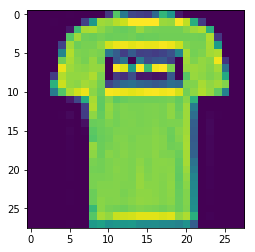

In [13]:
plt.imshow(x_train[1])

In [0]:
x_train, x_test = x_train/255.0, x_test/255.0

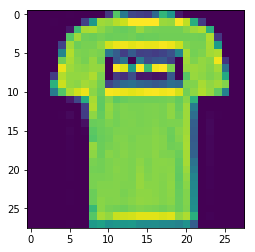

In [16]:
plt.imshow(x_train[1])

In [17]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [0]:
model_cloths = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape= (28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model_cloths.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_cloths.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5016 - accuracy: 0.8239
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3781 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3384 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3147 - accuracy: 0.8838
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2959 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2807 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2684 - accuracy: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2551 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2492 - accuracy: 0.9063
Epoch 10/10
60

In [27]:
test_loss, test_acc = model_cloths.evaluate(x_test, y_test, verbose=2)
print(test_loss)
print(test_acc)

10000/1 - 1s - loss: 0.2987 - accuracy: 0.8807
0.35372256393432616
0.8807


In [0]:
predictions = model_cloths.predict(x_test)

In [31]:
predictions

array([[8.2555738e-07, 1.1458423e-07, 1.9067789e-07, ..., 6.7137489e-03,
        1.3787322e-07, 9.9313897e-01],
       [4.4069326e-05, 4.4974332e-08, 9.9949038e-01, ..., 1.1112895e-20,
        1.2804134e-10, 3.3428327e-16],
       [2.0825501e-06, 9.9999750e-01, 1.9150316e-07, ..., 6.4725457e-24,
        1.2390766e-11, 8.8059425e-17],
       ...,
       [2.8416609e-05, 6.0669308e-10, 1.1255112e-05, ..., 1.3114891e-08,
        9.9962008e-01, 1.8832905e-14],
       [5.2639467e-07, 9.9995971e-01, 6.8422634e-07, ..., 1.9027346e-17,
        2.9538569e-09, 1.8109627e-11],
       [1.6626071e-04, 2.3029997e-06, 8.8173503e-05, ..., 2.3567105e-02,
        2.5798305e-04, 1.6092916e-04]], dtype=float32)

'T-shirt/top'

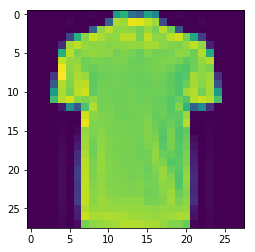

In [47]:
plt.imshow(x_test[177])
class_names[np.argmax(predictions[177])]